# What to do with missing data

The last few sessions we have be sort of ignoring kind of a large éléphante (for you Parisians) in the room. 

We have been removing any instances with NA in our data (whats the code to do this?) and treating it as if it were nonexistant, meaningless. 

Lets read in our data

In [1]:
train = read.csv("../train.csv", header = T, stringsAsFactors=FALSE) 
nrow(train)
train.n = train[complete.cases(train),] ##removes missing data 
nrow(train.n)
nrow(train) - nrow(train.n)

[1] 891

[1] 714

[1] 177

We are losing about __~200__ cases by just removing missing data! Think of the children!

While removing data makes making a model easier, what if the rows with missing data can help our model to predict who survived and who died on the titantic. 

If anything, __having more cases will help our model__, _no matter what_. Especially since we do not have _that_ much data to begin with. 

Here we will use <font color=red>Regression Models</font> to predict missing values
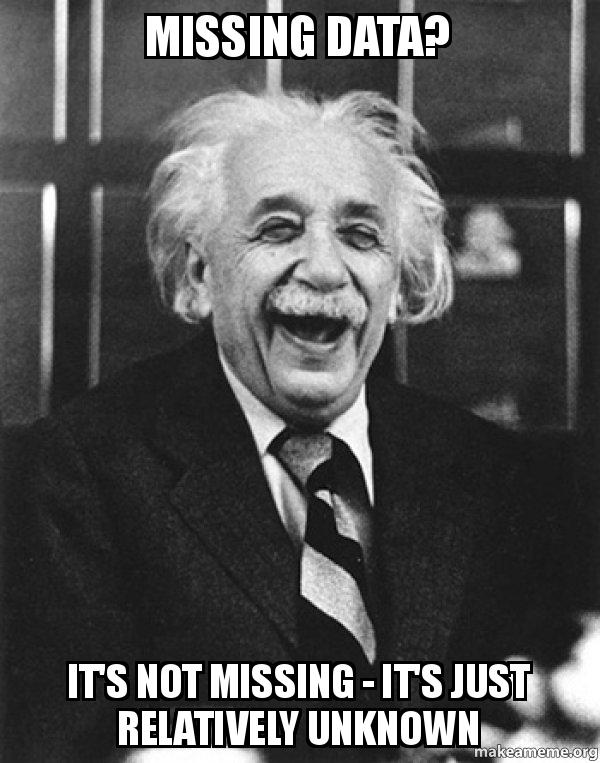



## <font color=red>Regression Models</font>

Everyone and their cat has heard of Linear Regression. The essential idea is to fit the best line (regression line) through a set of data points. We can then use the line to predict our _Response Variable_ using the values of our _Independant variables_

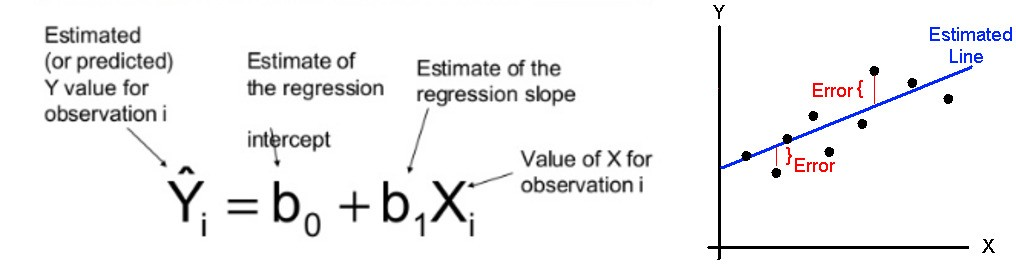
*from https://cdn-images-1.medium.com/max/1600/1*csk8XTXy0j__hm_kbkwxCw.jpeg* 

But really Linear Regression is a special case of something called __generalized linear models(GLM)__ 

<font color=blue>__GLMs__</font> are a set of regression models that attempt to predict certain cases of response variables

1. __Linear Regression__ attempts to predict ***Normally distributed*** values from ***-∞ to +∞*** 

2. __Logistic Regression__ attempts to predict a probability of a ___binary class___ from ***0 to 1***

3. __Poisson Regression__ attempts to predict ___count data who's mean is equal to its variance___ 

Lets look at our missing data and see which models we can use to predict paticular features: 


In [87]:
train.missing = train[! complete.cases(train),] 
## in general read '!' as 'not' this is the same accross all programming languages
#whats going on here
head(train.missing) 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
18,18,1,2,"Williams, Mr. Charles Eugene",male,NA,0,0,244373,13.0000,,S
20,20,1,3,"Masselmani, Mrs. Fatima",female,NA,0,0,2649,7.2250,,C
27,27,0,3,"Emir, Mr. Farred Chehab",male,NA,0,0,2631,7.2250,,C
29,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NA,0,0,330959,7.8792,,Q
30,30,0,3,"Todoroff, Mr. Lalio",male,NA,0,0,349216,7.8958,,S


Since Age is the missing feature across the data, let try to predict it.

What would be the appropriate regression model?  How would we figure that out? 

<font color=red>__HISTOGRAMS!!?!?!__</font>

[1] 29.69911765

[1] 211.0191247

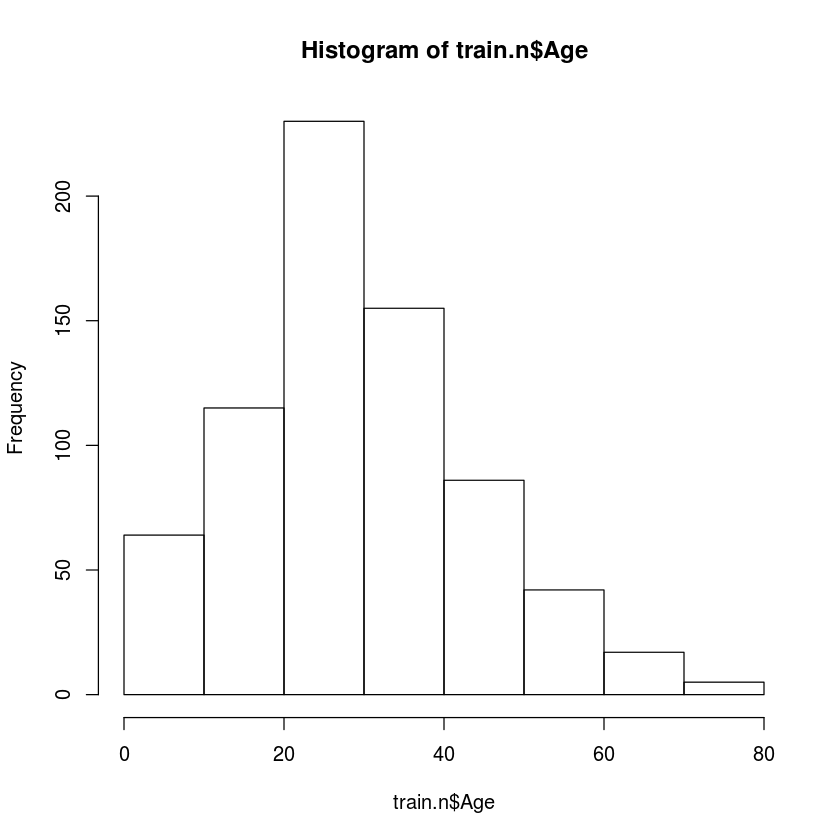

In [89]:
###why are we using train.n??
mean(train.n$Age)
var(train.n$Age)
hist(train.n$Age)

Based on the fact that Age is approximately normally distributed, and the mean and variance are not equal, a _linear regression_ would be most appropriate. Where Age is the response variable, using __numeric__ features as predictors. 

To fit a linear regression model we use the __`glm()`__ function with options. 

Fitting a __`glm()`__ model, requ

In [ ]:
train.n$Sex = as.numeric(as.factor(train.n$Sex)) ##why are we doing this 
train.n$Embarked = as.numeric(as.factor(train.n$Embarked)) ##why are we doing this 

model = glm(data = train.n , formula = Age ~ (Pclass*SibSp*Survived*Sex*Fare*Embarked*Name), 
            family=gaussian(link = "identity") )  
summary(model)
### calculate RMSE ###
rss = c(crossprod(model$residuals)) 
mse = rss / length(model$residuals)
rmse = sqrt(mse)
rmse


So our average error in predicting Age is about ~12. Not great. But with more fine tuning we can probably get better RMSE. 
Now lets use the model to predict the missing values

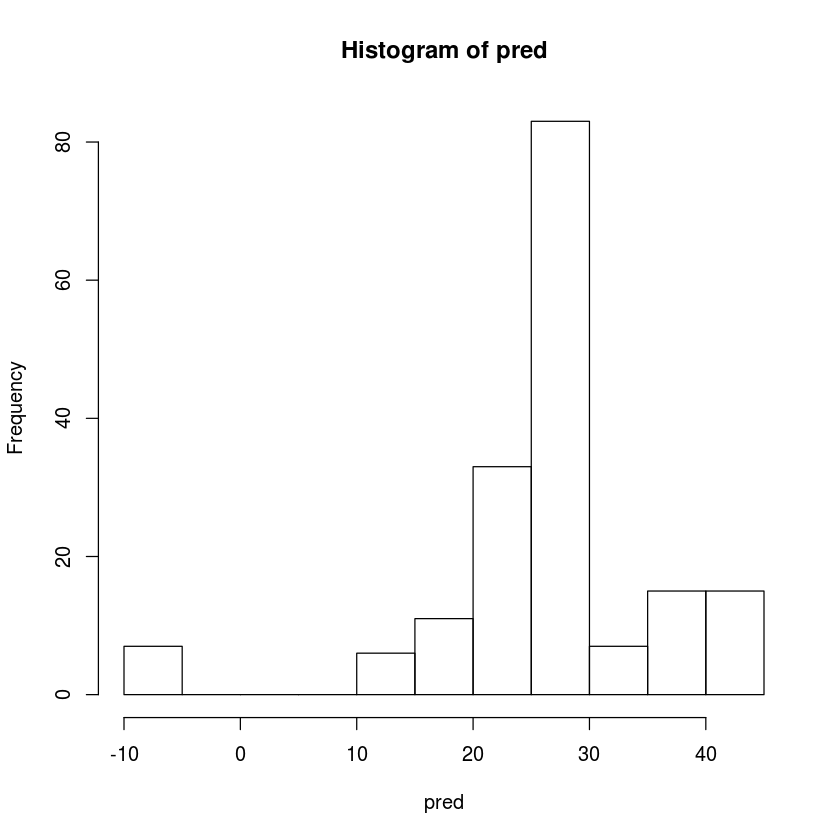

In [44]:
train.missing$Sex = as.numeric(as.factor(train.missing$Sex)) 
train.missing$Embarked = as.numeric(as.factor(train.missing$Embarked)) 
train.missing$Age = NULL
pred = predict(model, train.missing)
train.missing$Age = pred 
hist(pred) 


Looks like we have some predictions, however we get some negative values (why? hint: look at the betas in summary(model), also think about the average error of 10). 
Lets make any negative values, age = 0 . 

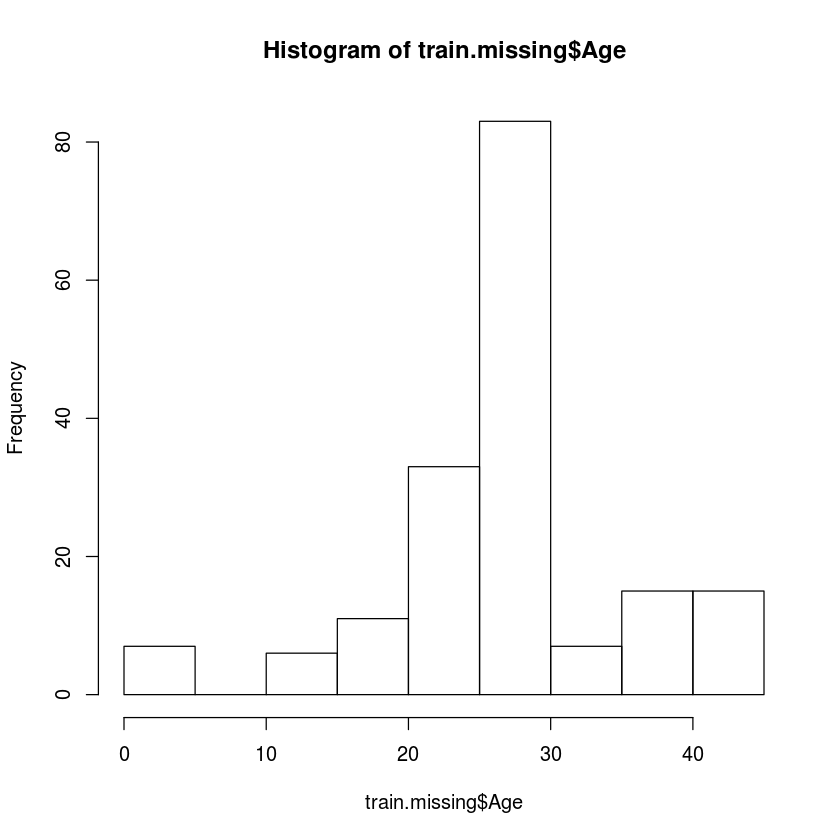

In [45]:
train.missing[train.missing$Age < 0 , ]$Age = 0 
hist(train.missing$Age)

Now lets combine train.missing with train.n using rbind to get our complete dataset without missing values!

In [71]:
head(train.n,1)
head(train.missing, 1) 
head(train.missing[,c(1,2,3,4,5,12,6,7,8,9,10,11)],1) #need to match the columns 
train.complete = rbind(train.n, train.missing[,c(1,2,3,4,5,12,6,7,8,9,10,11)])
nrow(train.complete)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",2,22,1,0,A/5 21171,7.25,,4


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
6,6,0,3,"Moran, Mr. James",2,0,0,330877,8.4583,,2,28.6502


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,6,0,3,"Moran, Mr. James",2,28.6502,0,0,330877,8.4583,,2


[1] 891

Now that we have a complete set of data, lets train a new model to predict who survived the titanic. 

We will be working with __Artificial Neural Networks (ANN) AKA Multilayer Perceptrons__

## <font color=red>Computational Modeling of Biology in ANNs</font> 

When you think of a Biological Neural Network, what comes to mind? 
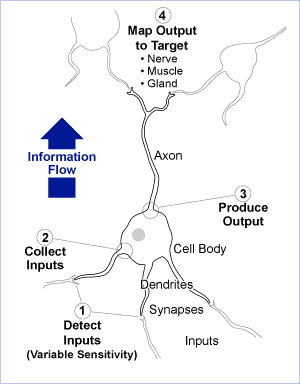
_https://www.isixsigma.com/wp-content/uploads/images/stories/migrated/graphics/453a.GIF_

An electrial signal is passed from a synapse to axon to another synapse on another neuron. The terminal neuron then fires __if and only if, the signal reaches a specific depolarization threshold__. 
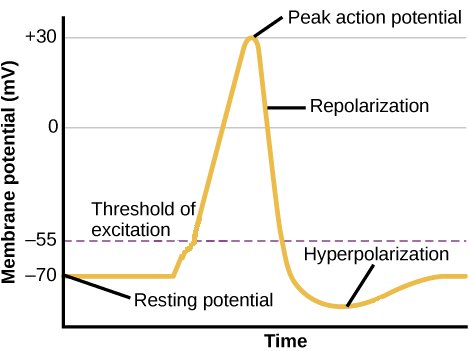
https://ka-perseus-images.s3.amazonaws.com/582a686c492dfcd23275aec574d012013689fe84.png

If the threshold isn't reached, __multiple neurons can integrate their potentials to the terminal neuron__, and their AP will sum, __increasing the probablity of the terminal neuron to fire__: 
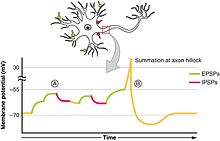
_https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/1224_Post_Synaptic_Potential_Summation.jpg/220px-1224_Post_Synaptic_Potential_Summation.jpg_

This is the underlying biology behind __Artificial Neural Nets__
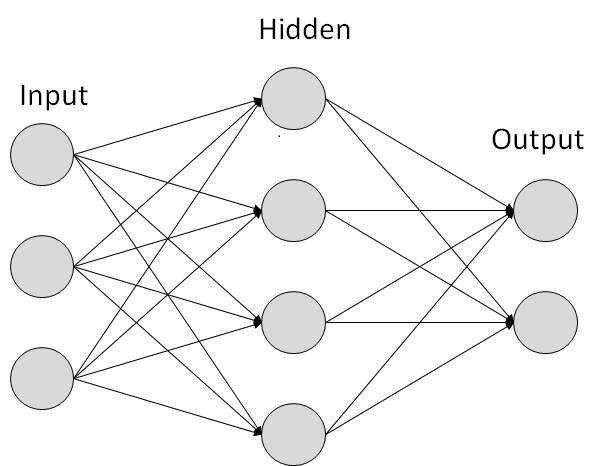
Think of each node as a _neuron_ and each arrow as axons that point to a terminal neuron. 

The input neurons are our features, lets look at the first row of our training set without our class: Survived 

In [58]:
train.complete[1,c(3,4,5,6,7,8,9,10,11,12)]

Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,"Braund, Mr. Owen Harris",2,22,1,0,A/5 21171,7.25,,4


The input layer is just the values of the features for a given row: kinda like this: 

In [59]:
t(train.complete[1,c(3,4,5,6,7,8,9,10,11,12)])

,1
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,2
Age,22
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25
Cabin,
Embarked,4


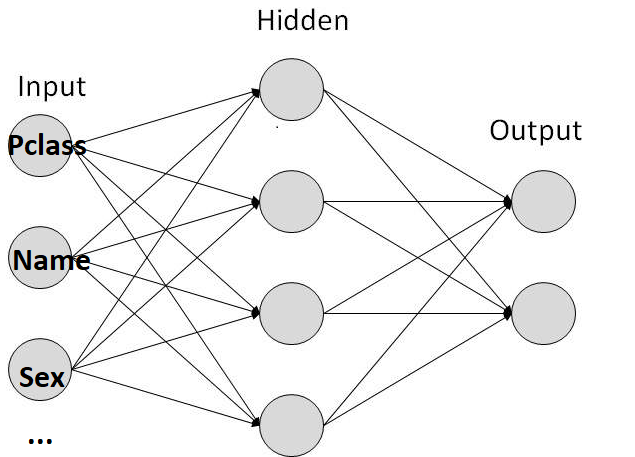

The __hidden layer__ are typically _linear combinations of the input features_ 

Think of hidden layers as _combinations of features_ __creating new features__ 

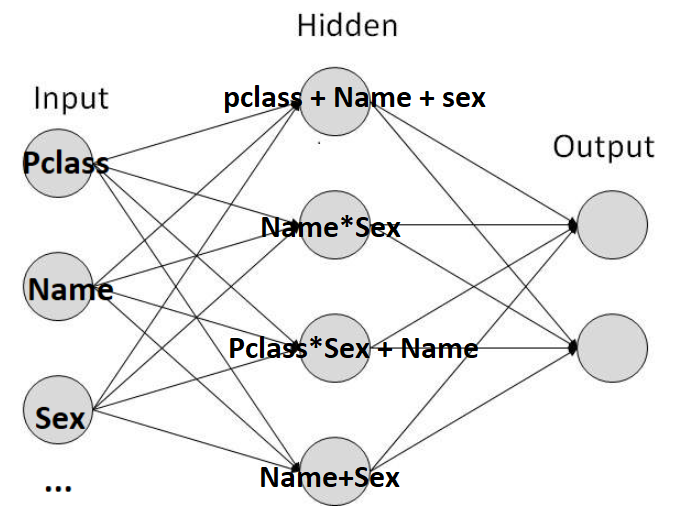
The hidden layer is hidden, because we do not know exactly what combinations of features are present in the NN

The __final layer__ in a NN is the __output layer__. The output layer is the class we want to predict

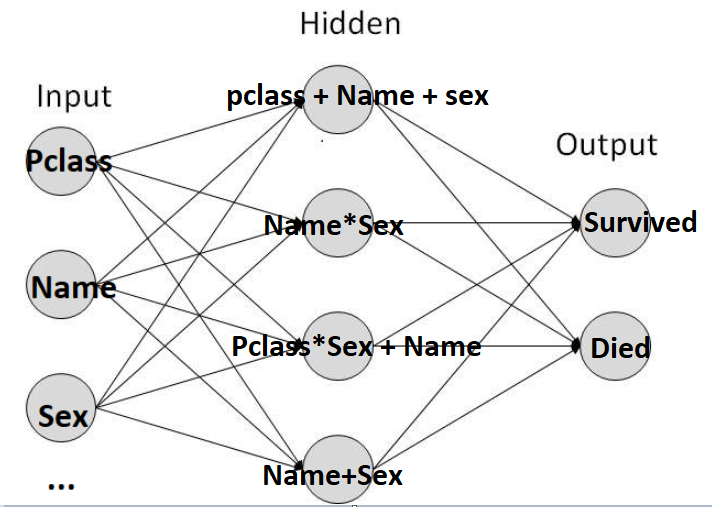

Each of the activation arrows contain a the value of the neuron with a bias or weight... More on the bias later.  
activation_arrow = weight*value of neuron 

The arrows are taken together (summed) and passed through an activation function. 

Sum(all activation_arrows)* activation function

Each connection of the neurons to a new layer must pass through an activation function, like a threshold. This activation function is modeled as such: 


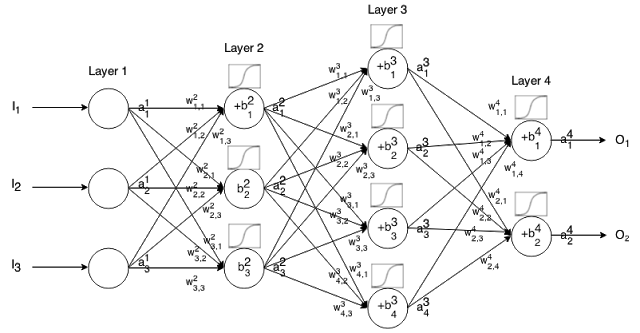


When we look at activiation functions, we want to look for functions that are resistant to change, but rapidly go to 1 after a certain threshold. Some examples are :
SinH or sigmoid curve

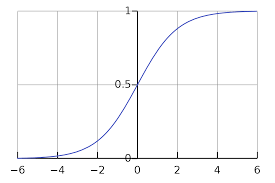
 or tanH 


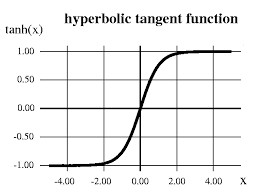




Like neurons, the terminal neuron will fire if and only if the sum of all activation_arrows reaches a certain threshold value. 
This then proceeds forward until the output layer is fired.  

During __training__ two cases can happen: 

1. The output will give the __correct answer__ if this is the case, then the weights of the arrows will not change. 
2. The output will give the __wrong answer__ a process called ___backpropagation___ occurs: 

During __backpropagation__ the neural network goes from the output layer to the input layer, here it will __adjust the weights for each connect to select for the correct output__ 

Gif to see how it works:
https://giphy.com/gifs/neural-networks-ZTh5Huy9MZZra

One __Epoch__ is exactly one __forward/backward pass__

Lets run a quick example on our data: 


In [72]:
library(neuralnet)

##let first remove non numeric columns from training 
head(train.complete,1)
train.complete[,c(1,4,9,11)] = NULL
head(train.complete)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",2,22,1,0,A/5 21171,7.25,,4


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,2,22,1,0,7.2500,4
2,1,1,1,38,1,0,71.2833,2
3,1,3,1,26,0,0,7.9250,4
4,1,1,1,35,1,0,53.1000,4
5,0,3,2,35,0,0,8.0500,4
7,0,1,2,54,0,0,51.8625,4


In [74]:
##Next we need all of the features to be in the same scale for a NN to work: 
maxs <- apply(train.complete, 2, max) 
mins <- apply(train.complete, 2, min)
head(train.complete)
scaled <- as.data.frame(scale(train.complete, center = mins, scale = maxs - mins))
head(scaled) ##now data is from 0 to 1 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,2,22,1,0,7.2500,4
2,1,1,1,38,1,0,71.2833,2
3,1,3,1,26,0,0,7.9250,4
4,1,1,1,35,1,0,53.1000,4
5,0,3,2,35,0,0,8.0500,4
7,0,1,2,54,0,0,51.8625,4


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,1,1,0.2750,0.125,0,0.01415106,1.0000000
2,1,0,0,0.4750,0.125,0,0.13913574,0.3333333
3,1,1,0,0.3250,0.000,0,0.01546857,1.0000000
4,1,0,0,0.4375,0.125,0,0.10364430,1.0000000
5,0,1,1,0.4375,0.000,0,0.01571255,1.0000000
7,0,0,1,0.6750,0.000,0,0.10122886,1.0000000


In [ ]:
n <- names(train.complete)
f <- as.formula(paste("Survived ~", paste(n[!n %in% "Survived"], collapse = " + ")))
f
nn <- neuralnet(f,data=train.complete,hidden=c(5,3),linear.output=T)
predict(nn, test.data)
plot(nn)

Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked